
In the following exercise, we will create a simulation of an efficient trade model for self-produced goods. The model will consider consumer preferences and calculate the social utility of these goods based on all individual preferences. This involves calculating the price of the social utility for each good and the total production. A monetary base is then computed, and a percentage of it is distributed to individuals using the same parameters, taking into account their individual production. Finally, the model simulates various production scenarios with the aim of minimizing the total remaining balance for all individuals.

## Individuals

Each individual is has two inmutable variables in the model: **preferences matrix** and **production space**. Although this two can change in real life for the moment they will stay inmutable. 


### Preferences Matrix

Given $k$ preferences over $n$ goods, we will construct a preference matrix with dimensions $n \times k$. To simplify calculations, we will work with a square matrix by taking $n$ preferences. Each column of the preference matrix represents a good, and each row represents a normalized basket of preferences. We assume that all these preference baskets provide the same utility to the individual and are calculated on a 100-point preference system (assigning a value out of 100 points to each good). It's important to note that this preference matrix does not assume rationality among preferences and offers a different approach to understanding market dynamics.

### Production Space

Additionally,the production space represents the amount of space each individual can allocate for production. We will assume that each individual's production space is fully utilized for each term.


On the other hand, all individuals have three time-dependent variables: a **money balance** and a **production vector**, and a space occupation vector.

### Money Balance

The money balance begans in $0$ at $t = 0$ and accumulates over time.

### Production Vector

The production vector is a variable that indicates how the space is occupied and how much time is remaining for the production of each good.

## Goods, Money and Prices

For the purpose of complete the market dynamics of the model, we need to make certain assumptions about the goods in order to facilitate price and money injection calculations.


### Goods

All goods are compose by two main characteristics: space per unit and time of production

#### Space per Unit

The space per unit of a good is the space occupied to produce 100 grams of the product. We will use 100 grams as a unit reference. Each good has a different space per unit constant and it doesnt depend on any other factors. 

#### Time of Production

At the same time, each product has a production time that depends on a gamma distribution $X \sim \Gamma(\alpha, \lambda)$
where the parameters $\alpha$ and $\lambda$ are unique for each good. 

### Money 

Each period of time there is a money injection based on the goods produced and the social utily value of each good, first lets define social utily value of each good $a_j$ $j = 1,2 \ldots, n$ for $r$ consumers with $k$ preferences and a preference matrix $M_{n \times k} $:

$$
SUV_{a_j} = \sum_{i = 1}^r \sum_{j = 1}^k  M_{n \times k}(a_j) 
$$

where $ M_{n \times k}(a_j)$ is an entry of the preference of each good $a_j$ in each basket of preference of each individual. With this and the production of each individual, we calculate the money injection $M_t$ of each period $t$, given $n$ types of goods where $P_i^{a_j}$ is the production of the good $a_j$ by the individual $i$: 

$$

M_t = \sum_{i = 1}^r \sum_{h = 1}^n SUV(a_j) \times P_i^{a_j}

$$


### Libraries


In [128]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random

### Creating Goods

In [83]:

data = {
    "Tomates": {
        "Agua": (10, 25),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.1, 0.3),
        "Crecimiento": 60,
    },
    "Espinacas": {
        "Agua": (5, 15),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.2, 0.4),
        "Crecimiento": 35,
    },
    "Lechugas": {
        "Agua": (10, 25),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.2, 0.4),
        "Crecimiento": 40,
    },
    "Fresas": {
        "Agua": (10, 20),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.1, 0.3),
        "Crecimiento": 90,
    },
    "Pimientos": {
        "Agua": (10, 20),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.1, 0.3),
        "Crecimiento": 70,
    },
    "Albahaca": {
        "Agua": (5, 15),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.2, 0.4),
        "Crecimiento": 30,
    },
    "Pepinos": {
        "Agua": (10, 25),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.1, 0.3),
        "Crecimiento": 55,
    },
    "Hierbas": {
        "Agua": (5, 15),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.2, 0.4),
        "Crecimiento": 20,
    },
    "Zanahorias": {
        "Agua": (5, 15),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.1, 0.3),
        "Crecimiento": 70,
    },
    "Habas": {
        "Agua": (10, 20),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.1, 0.3),
        "Crecimiento": 80,
    }
}





### Creating Individuals

In [84]:
class Individual :
    def __init__(self):
        self.space = np.random.randint(1, 50)
        self.favorite_plant = self.favorite_plant()
        self.start = True
        self.crop_days = 0

    def favorite_plant(self):
        plants = [
                "Tomates",
                "Espinacas",
                "Lechugas",
                "Fresas",
                "Pimientos",
                "Albahaca",
                "Pepinos",
                "Hierbas",
                "Zanahorias",
                "Fresas",
                "Habas",
            ]
        random_plant = random.choice(plants)
        return random_plant


In [135]:
def seed(size):
    society = []
    for _ in range(size):
        individual_instance = Individual()
        society.append(individual_instance)

    return society

def population_growth(society, rate):
    population_size = len(society)
    growth = np.ceil(population_size*rate)

    for _ in range(int(growth)):
        individual_instance = Individual()
        society.append(individual_instance)

    return society

import math

def logistic_growth(t, K, P0, r):
    """
    Calculate the population at time t in a logistic growth model.

    Args:
    t (int): Time in days.
    K (float): Carrying capacity.
    P0 (float): Initial population.
    r (float): Growth rate.

    Returns:
    float: Population at time t.
    """
    exponent = -r * t
    population = K / (1 + ((K - P0) / P0) * math.exp(exponent))
    return population




def get_benefits(individual, data):
    favorite_plant = individual.favorite_plant
    info_plant = data[favorite_plant]
    benefits = {}
    categories = ["Agua", "Emisiones", "Tierra", "Plástico"]
    for category in categories:
        interval = info_plant[category]
        random_number = random.uniform(interval[0], interval[1])
        benefits[category] = random_number

    return benefits





def crop_benefits(individual, data):
    benefits = {}
    if individual.start == True and individual.crop_days == 0:
        
        favorite_plant = individual.favorite_plant
        crop_days = data[favorite_plant]["Crecimiento"]

        individual.start = False
        individual.crop_days = crop_days

    if individual.start == False and individual.crop_days >= 1:

        individual.crop_days -= 1

    if individual.start == False and individual.crop_days == 0:

        favorite_plant = individual.favorite_plant
        crop_days = data[favorite_plant]["Crecimiento"]
        benefits = get_benefits(individual, data)
    
    return benefits        


def metrics(society, data): 
    metrics = {
    "Agua": 0,
    "Emisiones": 0,
    "Tierra": 0,
    "Plástico": 0
    }

    plant_dict = {
        "Tomates": 0,
        "Espinacas": 0,
        "Lechugas": 0,
        "Fresas": 0,
        "Pimientos": 0,
        "Albahaca": 0,
        "Pepinos": 0,
        "Hierbas": 0,
        "Zanahorias": 0,
        "Fresas": 0,
        "Habas": 0
        }
    
    for individual in society:
        individual_benefits = crop_benefits(individual, data)
        if not individual_benefits:
            pass
        else: 
            metrics["Agua"] += individual_benefits["Agua"]
            metrics["Emisiones"] += individual_benefits["Emisiones"]
            metrics["Tierra"] += individual_benefits["Tierra"]
            metrics["Plástico"] += individual_benefits["Plástico"]
        plant_dict[individual.favorite_plant] += 1
        
    metrics.update(plant_dict)
    metrics['pop'] = len(society)
    
    return metrics

def simulation(seed_size, rate, data, days):
    seed_pop = seed(seed_size)
    simulation= []

    for day in range(0,days):
        if day %30 == 0:
            society = population_growth(seed_pop, rate)
        results = metrics(society, data)
        simulation.append(results)

    return simulation


result = simulation(1000, 0.05 ,data, 3650)
print(result[363])


{'Agua': 23079.976110894302, 'Emisiones': 288877.1480554383, 'Tierra': 588.0929897321994, 'Plástico': 406.65562324221264, 'Tomates': 155, 'Espinacas': 187, 'Lechugas': 159, 'Fresas': 355, 'Pimientos': 163, 'Albahaca': 175, 'Pepinos': 178, 'Hierbas': 186, 'Zanahorias': 167, 'Habas': 168, 'pop': 1893}


In [136]:
df = pd.DataFrame(result)
df.to_csv("output.csv", index=False)


/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

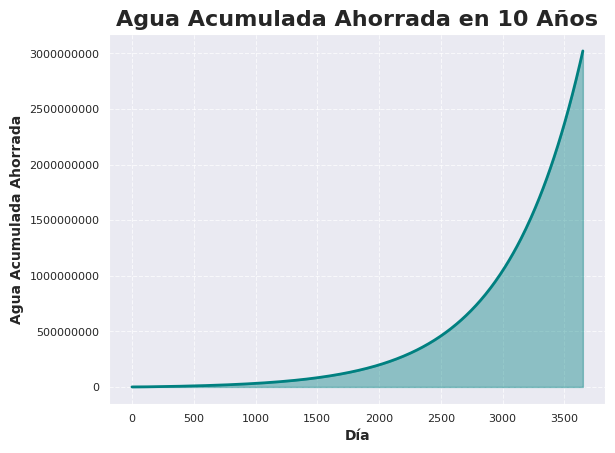

In [159]:
from matplotlib.ticker import FuncFormatter

df['Agua Acumulada Ahorrada'] = df['Agua'].cumsum()

# Crear un gráfico de línea Seaborn
sns.set_style("darkgrid")
ax = sns.lineplot(data=df, x=df.index, y='Agua Acumulada Ahorrada', color='teal', linewidth=2)
plt.fill_between(df.index, df['Agua Acumulada Ahorrada'], color='teal', alpha=0.4)  # Area plot

# Add a bold title
plt.title('Agua Acumulada Ahorrada en 10 Años', fontsize=16, fontweight='bold')

# Customize axis labels
plt.xlabel('Día', fontsize=10, fontweight='bold')
plt.ylabel('Agua Acumulada Ahorrada', fontsize=10, fontweight='bold')

# Customize tick labels for the y-axis to avoid scientific notation
formatter = FuncFormatter(lambda y, _: f'{y:.0f}')  # Format as integer without decimal places
ax.yaxis.set_major_formatter(formatter)

# Customize tick labels for the x-axis
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

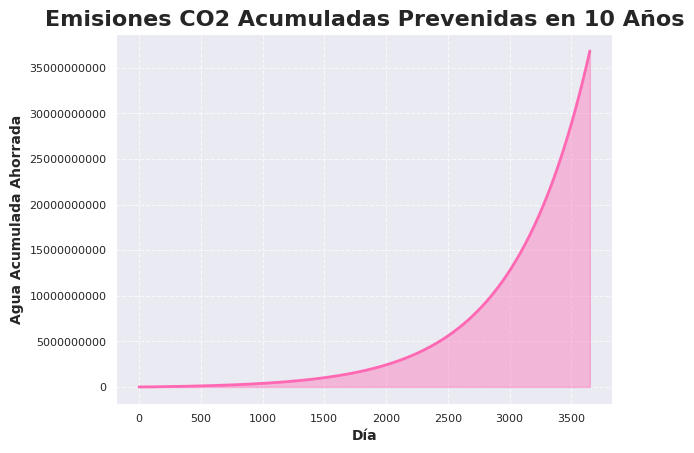

In [160]:
df['Emisiones Acumulada Ahorrada'] = df['Emisiones'].cumsum()

# Crear un gráfico de línea Seaborn
sns.set_style("darkgrid")
ax = sns.lineplot(data=df, x=df.index, y='Emisiones Acumulada Ahorrada', color='hotpink', linewidth=2)
plt.fill_between(df.index, df['Emisiones Acumulada Ahorrada'], color='hotpink', alpha=0.4)  # Area plot

# Add a bold title
plt.title('Emisiones CO2 Acumuladas Prevenidas en 10 Años', fontsize=16, fontweight='bold')

# Customize axis labels
plt.xlabel('Día', fontsize=10, fontweight='bold')
plt.ylabel('Agua Acumulada Ahorrada', fontsize=10, fontweight='bold')

# Customize tick labels for the y-axis to avoid scientific notation
formatter = FuncFormatter(lambda y, _: f'{y:.0f}')  # Format as integer without decimal places
ax.yaxis.set_major_formatter(formatter)

# Customize tick labels for the x-axis
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

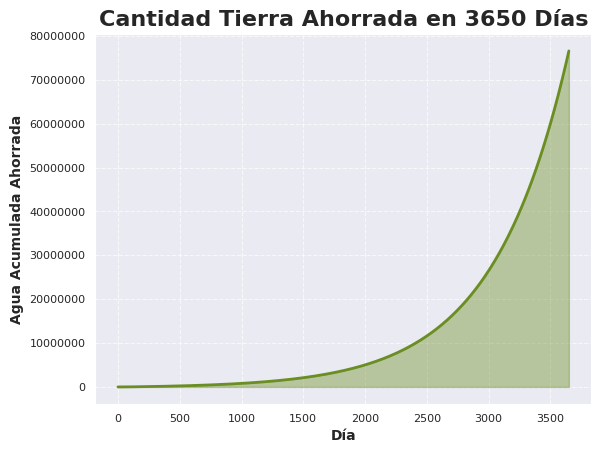

In [158]:
df['Tierra Acumulada Ahorrada'] = df['Tierra'].cumsum()

# Crear un gráfico de línea Seaborn
sns.set_style("darkgrid")
ax = sns.lineplot(data=df, x=df.index, y='Tierra Acumulada Ahorrada', color='olivedrab', linewidth=2)
plt.fill_between(df.index, df['Tierra Acumulada Ahorrada'], color='olivedrab', alpha=0.4)  # Area plot

# Add a bold title
plt.title('Tierra Ahorrada en 10 Años', fontsize=16, fontweight='bold')

# Customize axis labels
plt.xlabel('Día', fontsize=10, fontweight='bold')
plt.ylabel('Agua Acumulada Ahorrada', fontsize=10, fontweight='bold')

# Customize tick labels for the y-axis to avoid scientific notation
formatter = FuncFormatter(lambda y, _: f'{y:.0f}')  # Format as integer without decimal places
ax.yaxis.set_major_formatter(formatter)

# Customize tick labels for the x-axis
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()